In [29]:
import importlib
import common_utils
importlib.reload(common_utils)
from common_utils import get_unique_image_shapes,get_unique_image_paths,load_images_from_paths,build_image_dataframe,split_data, bin_ages
import tensorflow as tf
import numpy as np
from pathlib import Path

Check the shapes to see what we are working with and know how to handle the imput into the model later on

In [5]:
unique_shapes = get_unique_image_shapes()
for shape in unique_shapes:
    print(shape)


2025-03-31 20:22:50.547815: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-03-31 20:22:50.547945: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-31 20:22:50.547957: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-31 20:22:50.548120: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-31 20:22:50.548128: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(200, 200, 3)


In [2]:
paths=get_unique_image_paths()
len(paths)

9572

In [3]:
image_paths_csv=build_image_dataframe(paths)

<Axes: xlabel='age'>

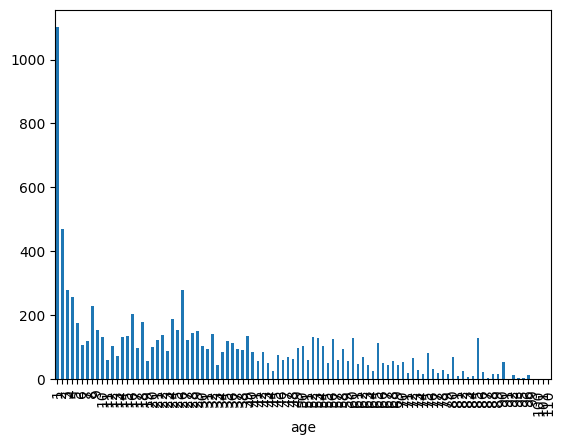

In [7]:
image_paths_csv.age.value_counts().sort_index().plot(kind='bar')

In [30]:
image_paths_csv=bin_ages(image_paths_csv)

In [31]:
image_paths_csv.head()

,path,age,age_bin,age_bin_label
0,../raw_data/face_age/024/3949.png,24,5,Young Adults (18–24)
1,../raw_data/face_age/024/4767.png,24,5,Young Adults (18–24)
2,../raw_data/face_age/024/5445.png,24,5,Young Adults (18–24)
3,../raw_data/face_age/024/7520.png,24,5,Young Adults (18–24)
4,../raw_data/face_age/024/2128.png,24,5,Young Adults (18–24)


In [35]:
image_paths_csv.path

0       ../raw_data/face_age/024/3949.png
1       ../raw_data/face_age/024/4767.png
2       ../raw_data/face_age/024/5445.png
3       ../raw_data/face_age/024/7520.png
4       ../raw_data/face_age/024/2128.png
                      ...                
9567    ../raw_data/face_age/060/7471.png
9568    ../raw_data/face_age/060/6784.png
9569    ../raw_data/face_age/060/6237.png
9570    ../raw_data/face_age/060/2079.png
9571    ../raw_data/face_age/060/5138.png
Name: path, Length: 9572, dtype: object

In [32]:
image_paths_csv.to_csv("./processed_data/image_paths.csv", index=False)

In [33]:
image_paths_csv.age_bin.value_counts().sort_index()

age_bin
0     1572
1      712
2      459
3      453
4      641
5      875
6     1325
7      854
8      901
9      710
10     489
11     299
12     282
Name: count, dtype: int64

In [ ]:
paths_train_df, paths_val_df, paths_test_df = split_data(image_paths_csv)